<a href="https://colab.research.google.com/github/MSaiCharan03/Diabetes-Prediction-using-KNN/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data['date_added'] = pd.to_datetime(data['date_added'])
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
data.fillna({'rating':'No Data', 'cast':'No Data', 'country':'No Data', 'director':'No Data'}, inplace=True)
# data.head()
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [9]:
most_recent_date = data['date_added'].max()
data.fillna({'date_added': most_recent_date}, inplace=True)
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


<ipython-input-9-c46a29af5731>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.fillna({'date_added': most_recent_date}, inplace=True)


In [10]:
data[data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [11]:
data[data.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
data.loc[data['director']=='Louis C.K.', 'duration'] = data['rating']
# data[data.director=='Louis C.K.'].head()

In [13]:
data.loc[data['director']=='Louis C.K.', 'rating'] = 'No Data'
data[data.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,No Data,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,No Data,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,No Data,66 min,Movies,The comic puts his trademark hilarious/thought...


In [14]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Visualizing Dataset**

Text(0.5, 1.0, 'Count Vs Type of Shows')

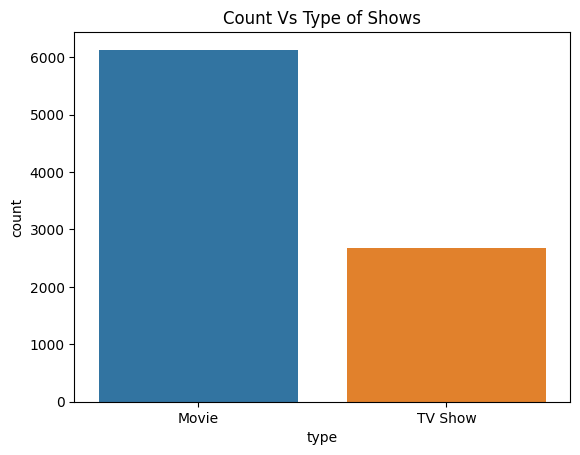

In [15]:
sns.countplot(x='type', data=data)
plt.title('Count Vs Type of Shows')

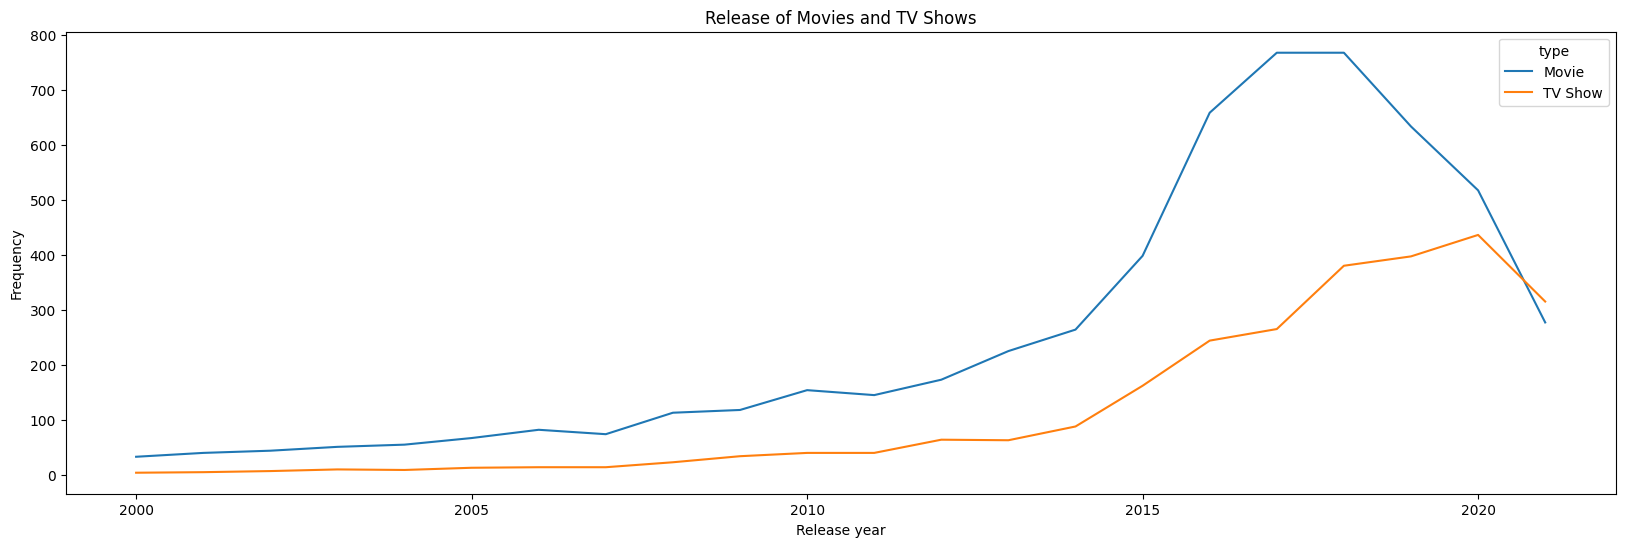

In [16]:
data_year = data.groupby(["release_year","type"],as_index = False).size()

data_year = data_year[data_year.release_year >= 2000]

# Set size
plt.figure(figsize=(20,6))

# Print a lineplot
sns.lineplot(x="release_year", y="size", hue="type", data=data_year)
plt.xlabel("Release year")
plt.ylabel("Frequency")
plt.title("Release of Movies and TV Shows")
plt.show()

In [17]:
# To know the countries where are produced most movies and TV shows
countries = data[['country','type']].copy()

countries['country'] = countries['country'].str.split(',')
countries_split = countries.explode('country')

print(countries_split)

            country     type
0     United States    Movie
1      South Africa  TV Show
2           No Data  TV Show
3           No Data  TV Show
4             India  TV Show
...             ...      ...
8802  United States    Movie
8803        No Data  TV Show
8804  United States    Movie
8805  United States    Movie
8806          India    Movie

[10850 rows x 2 columns]


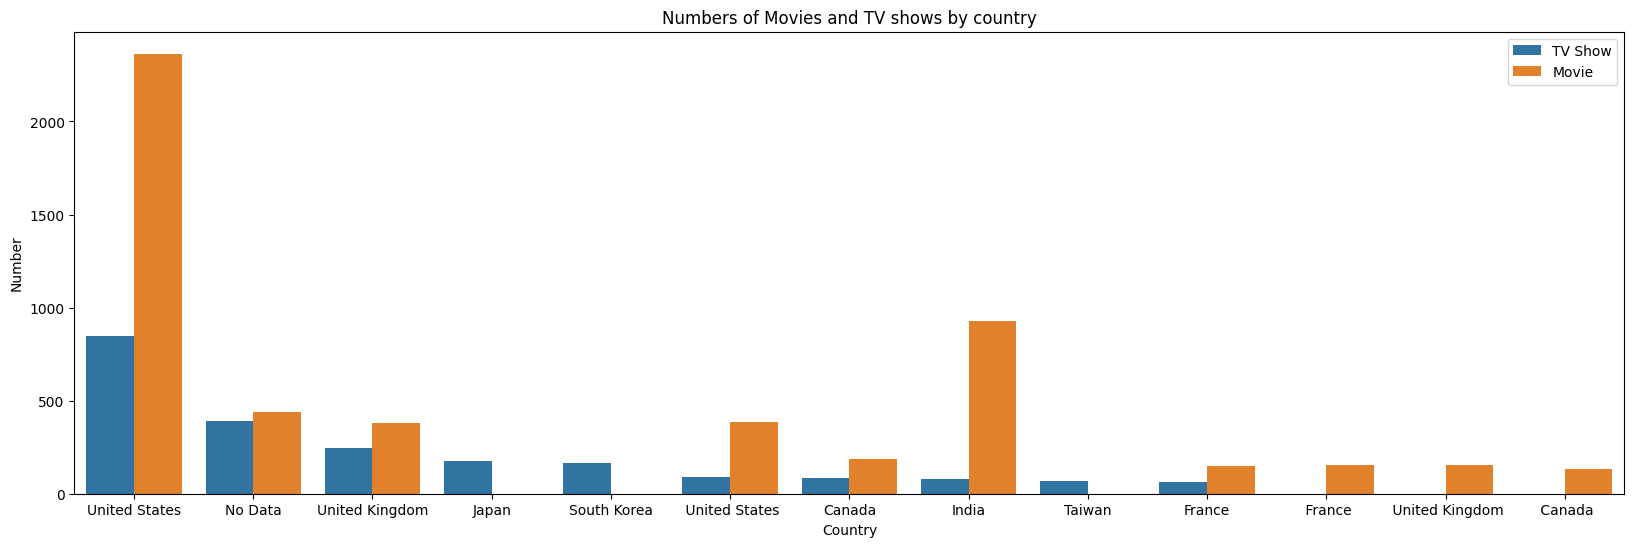

In [18]:
data_country = countries_split.groupby(['country','type'],as_index = False).size()

country_tv = data_country[data_country['type'] == 'TV Show'].sort_values('size',ascending = False).reset_index()[0:10]
country_series = data_country[data_country['type'] == 'Movie'].sort_values('size',ascending = False).reset_index()[0:10]

data_country = pd.concat([country_tv,country_series])

plt.figure(figsize=(20,6))

# Create a barplot
sns.barplot(x='country', y="size", hue="type", data=data_country);
plt.xlabel('Country')
plt.ylabel('Number')
plt.title('Numbers of Movies and TV shows by country')
plt.legend(loc='upper right');
plt.show()

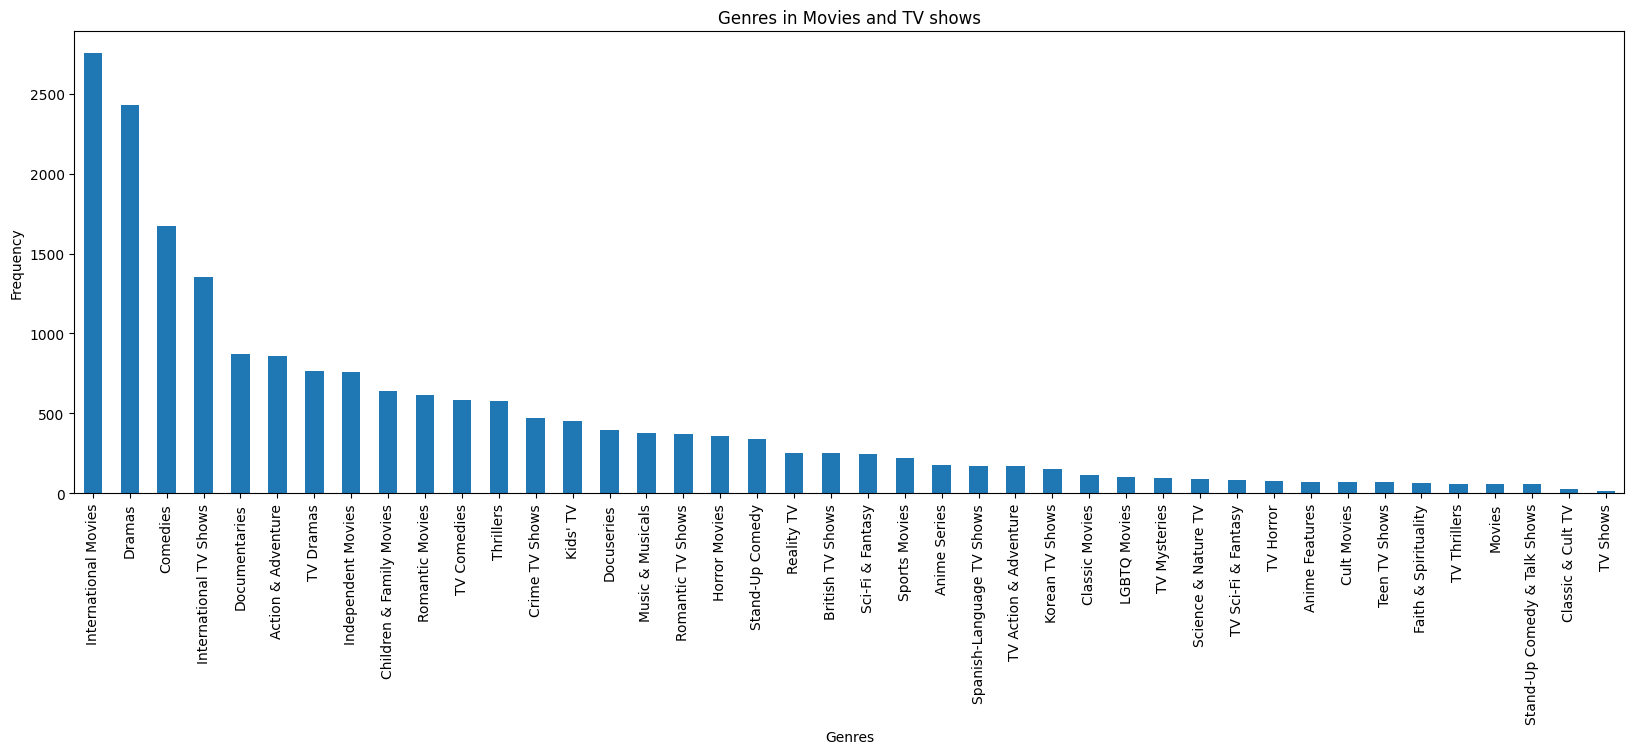

In [19]:
data_genres = data["listed_in"]
data_list = data_genres.str.split(",",expand = True)
data_list = data_list.rename(columns={0: "First", 1: "Second",2 :"Third"})

genre_list = pd.concat([data_list["First"],data_list["Second"],data_list["Third"]],ignore_index = True).dropna()
ungrouped = genre_list.groupby(genre_list).size().sort_values(ascending = False)
#print(ungrouped)

genre_list2 = genre_list.map(lambda p: p.strip())
ungrouped2 = genre_list.groupby(genre_list2).size().sort_values(ascending = False)
#print(ungrouped2)

# Set size
plt.figure(figsize=(20,6))

# We have a barplot
ungrouped2.plot.bar(x='lab', y='val', rot=0);
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genres in Movies and TV shows')
plt.show()

    rating  size
0        G    41
1    NC-17     3
2       NR    80
3  No Data     7
4       PG   287


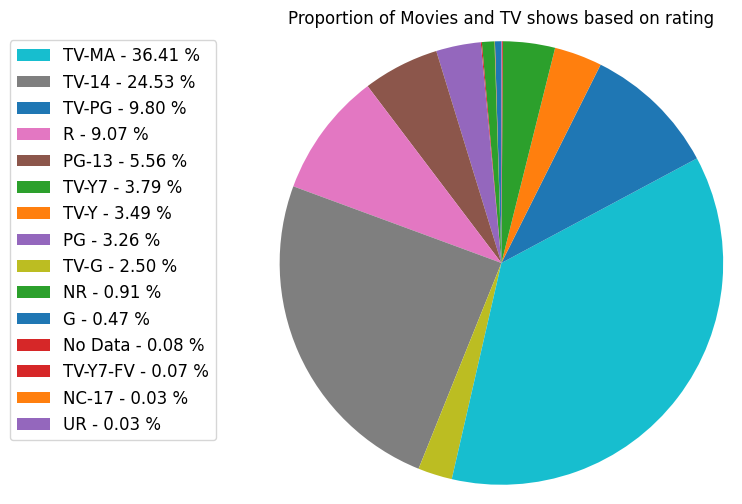

In [20]:
data_rating = data[['rating']].groupby('rating',as_index = False).size()
print(data_rating.head())

# We can create a pieplot
plt.figure(figsize=(20,6))

patches, texts = plt.pie(data_rating['size'], startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(data_rating['rating'], (data_rating['size']/data_rating['size'].sum())*100)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, data_rating['size']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Proportion of Movies and TV shows based on rating')
plt.show()

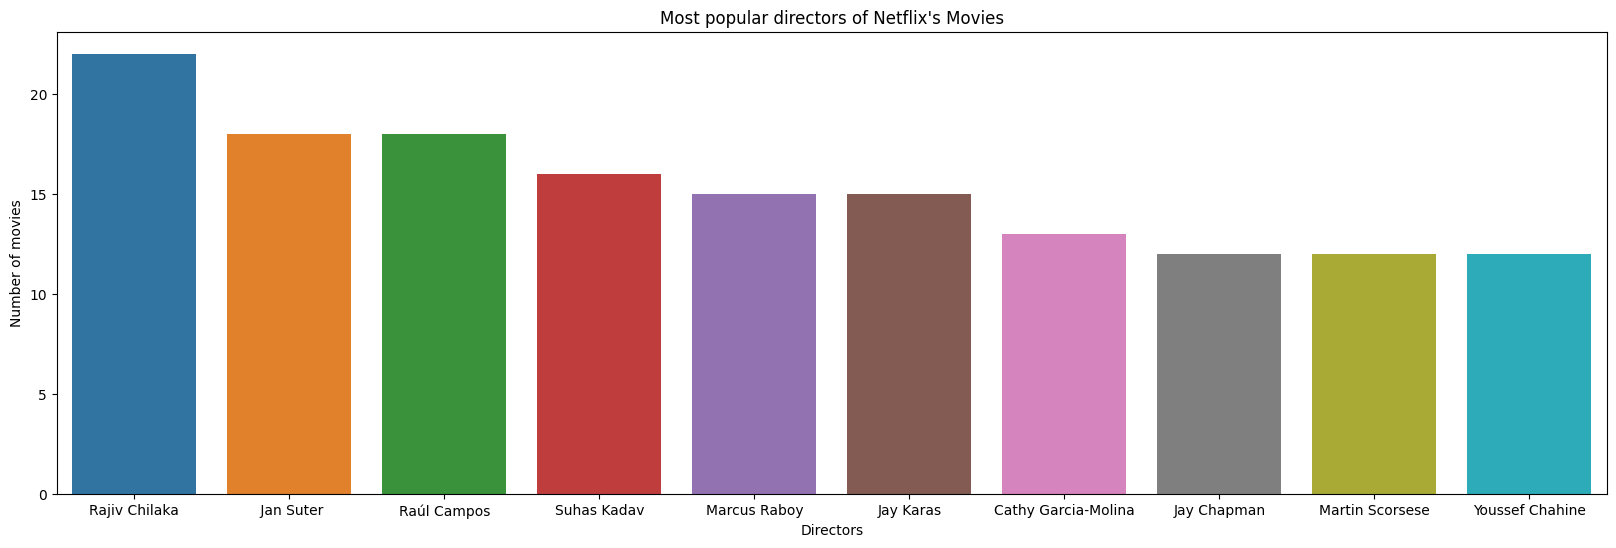

In [21]:
data_directors = data[data['type'] == 'Movie'][['director']]
#print(data_directors)

data_directors['director'] = data_directors['director'].str.split(',')
data_directors = data_directors.explode('director')
data_directors = data_directors[data_directors['director'] != 'No Data'] # Ignoring No Data
#print(data_directors)

directors = data_directors.groupby('director',as_index = False).size().sort_values('size',ascending = False)

# Create the barplot with the 10 most popular directors
plt.figure(figsize=(20,6))
sns.barplot(x='director', y="size", data=directors.iloc[0:10]);
plt.title("Most popular directors of Netflix's Movies")
plt.xlabel('Directors')
plt.ylabel('Number of movies')
plt.show()

In [22]:
data_duration_movie = data[data['type'] == 'Movie'][['duration','release_year']]
data_duration_movie['duration'] = data_duration_movie['duration'].str.replace(' min', '').astype(int)

data_duration_tv = data[data['type'] == 'TV Show'][['duration','release_year']]
data_duration_tv['duration'] = data_duration_tv['duration'].str.replace('Season.*', '',regex=True).astype(int)

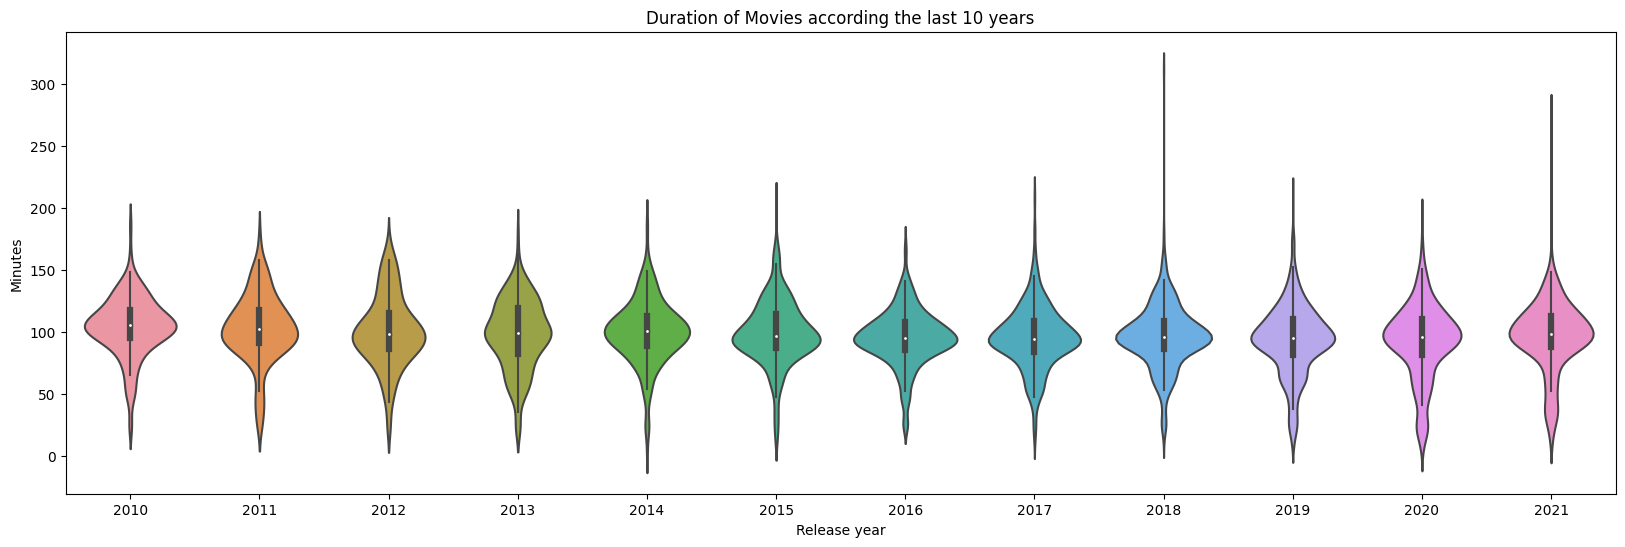

In [23]:
data_duration_movie_year = data_duration_movie[data_duration_movie['release_year']>= 2010]

# Create the plot
plt.figure(figsize=(20,6))
sns.violinplot(x="release_year", y="duration", data=data_duration_movie_year)
plt.title("Duration of Movies according the last 10 years")
plt.xlabel('Release year')
plt.ylabel('Minutes')
plt.show()

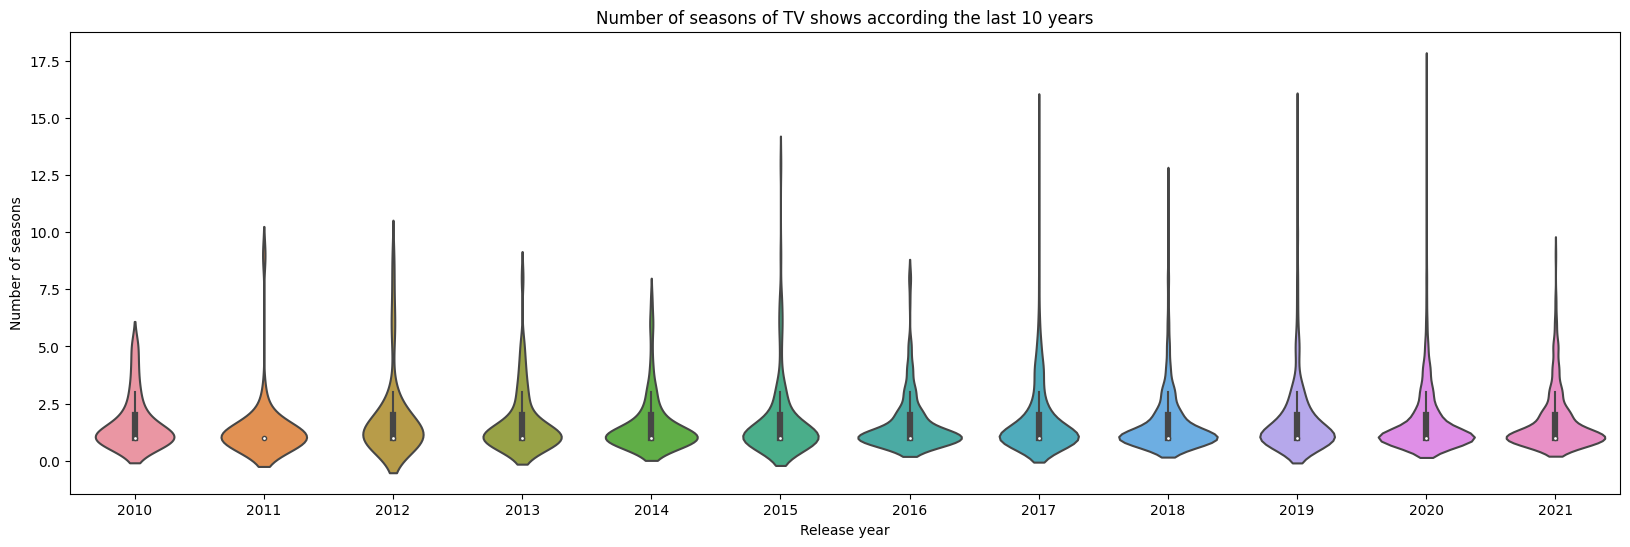

In [24]:
data_duration_tv_year = data_duration_tv[data_duration_tv['release_year']>= 2010]

# Create the plot
plt.figure(figsize=(20,6))
sns.violinplot(x="release_year", y="duration", data=data_duration_tv_year)
plt.title("Number of seasons of TV shows according the last 10 years")
plt.xlabel('Release year')
plt.ylabel('Number of seasons')
plt.show()

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)

    plt.show()

<ipython-input-25-1c2e785e7623>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
<ipython-input-25-1c2e785e7623>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


There are 20 types in the Netflix Movie Dataset


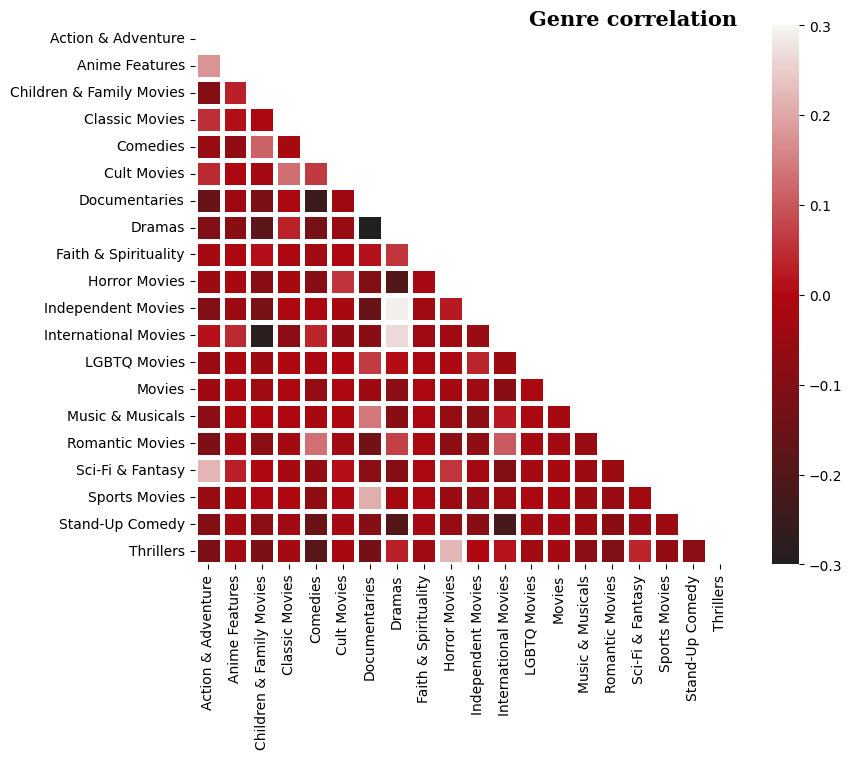

In [26]:
data_tv = data[data["type"] == "TV Show"]
data_movies = data[data["type"] == "Movie"]


genre_heatmap(data_movies, 'Movie')
plt.show()

<ipython-input-25-1c2e785e7623>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
<ipython-input-25-1c2e785e7623>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


There are 22 types in the Netflix TV Show Dataset


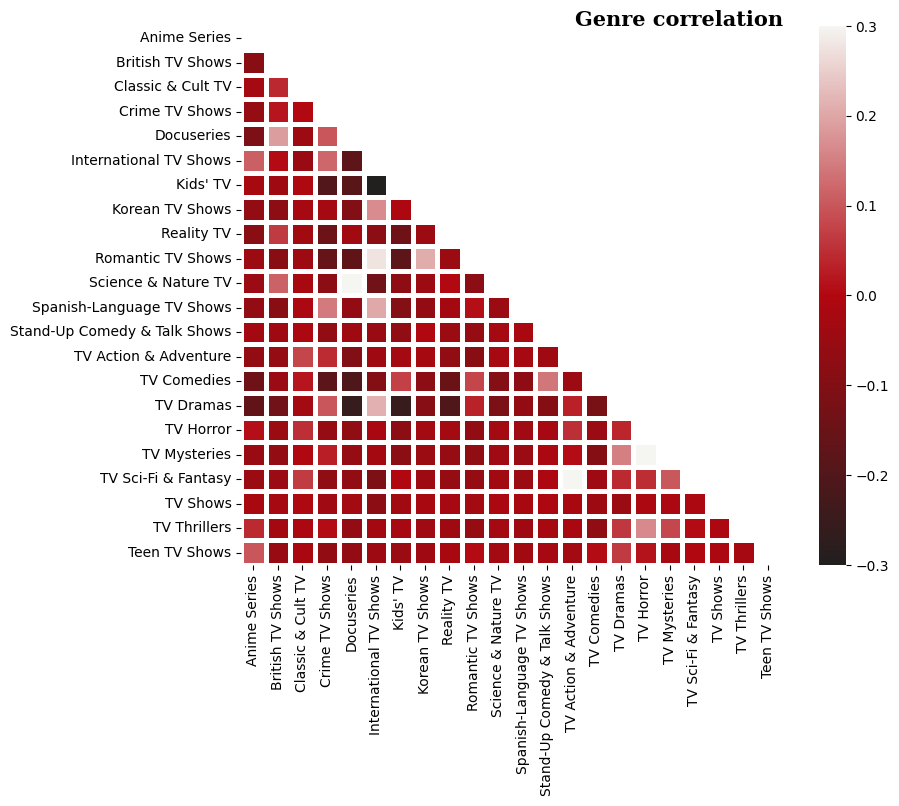

In [27]:
genre_heatmap(data_tv, 'TV Show')
plt.show()